# Visualizing CNN Kernels
## Objective
Understand how different convolutional kernels process and extract features from images.

[Prewitt operator](https://en.wikipedia.org/wiki/Prewitt_operator)

## Setup

In [7]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D


In [8]:
# Load and prepare data
path = "material/voxel.png" # replace with your own image if you want (remove or edit rotatio to fit new pic).
img = Image.open(path).convert('L').resize((150,150)) 
image_array = tf.keras.utils.img_to_array(img) # Convert to tensor
image_array = tf.expand_dims(image_array, 0)  # Create a batch

## Exercise

### Define different kernels
Create various kernels to see the different effects (edge detection, sharpening, blurring etc)

In [25]:
kernels = {
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Blur": np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0,
}

### Apply Kernels to the Image
Create a simple CNN model with a single convolutional layer for each kernel.
Apply the kernel to the image and display the output.

1/1 [==============================] - 0s 99ms/step


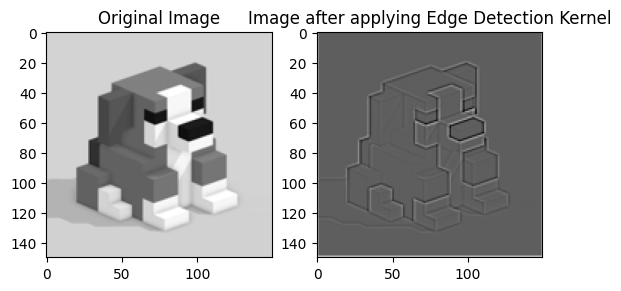

1/1 [==============================] - 0s 57ms/step


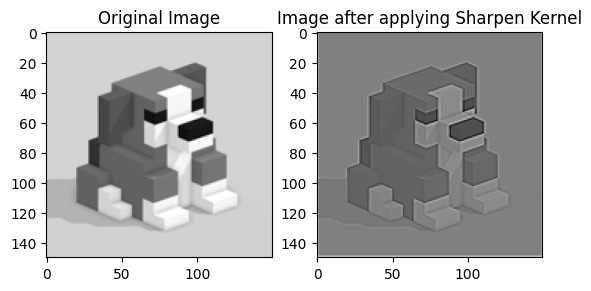

1/1 [==============================] - 0s 53ms/step


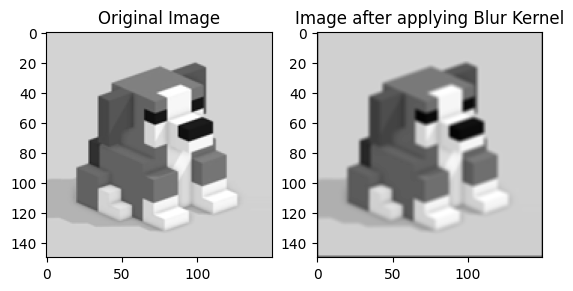

In [26]:
def apply_kernel_and_display(kernel, kernel_name, image):
    model = Sequential([
        Conv2D(filters=1, kernel_size=(3, 3), padding='same', 
               input_shape=(150, 150, 1), 
               kernel_initializer=tf.constant_initializer(kernel))
    ])

    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    

    processed_image = model.predict(image_array)
    processed_image = processed_image[0, :, :, 0]
    fig.add_subplot(1,2,2)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f"Image after applying {kernel_name} Kernel")
    plt.show()

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)


# Excercise 1
* Compare and Contrast: Discuss how each kernel affects the image differently.
* Feature Extraction: Analyze which features are highlighted by each kernel.
* Real-World Application: Relate the kernels to practical applications in image processing.

# Excercise 2
What are these kernels created to find?

1/1 [==============================] - 0s 61ms/step


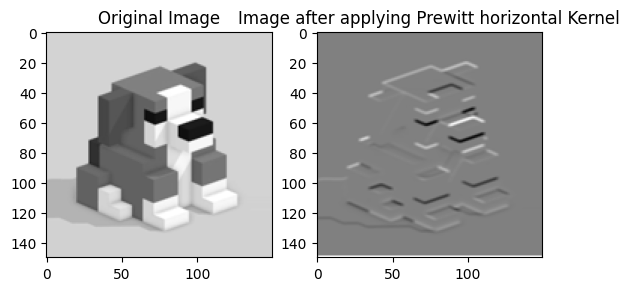

1/1 [==============================] - 0s 52ms/step


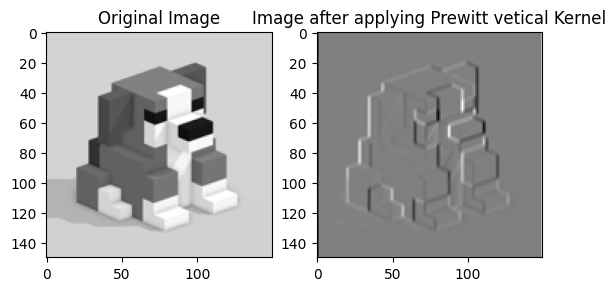

1/1 [==============================] - 0s 57ms/step


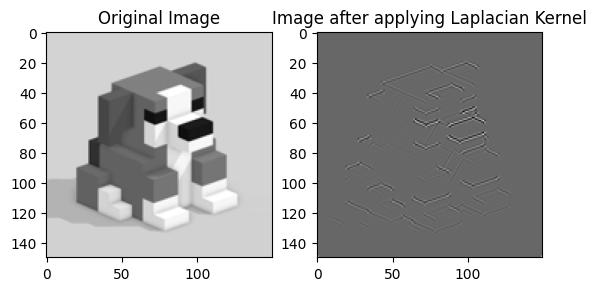

1/1 [==============================] - 0s 54ms/step


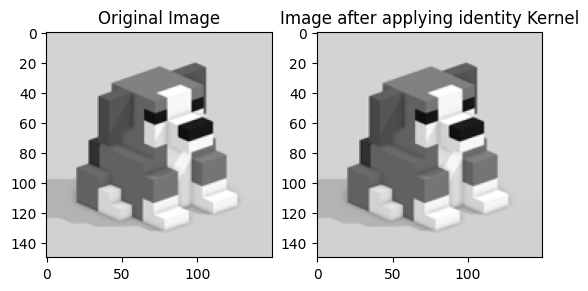

1/1 [==============================] - 0s 52ms/step


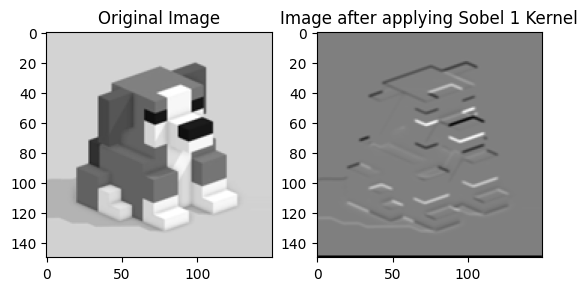

1/1 [==============================] - 0s 53ms/step


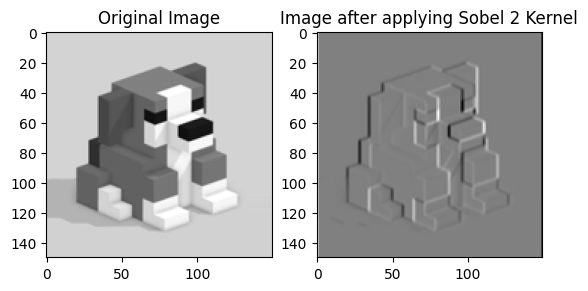

In [11]:
kernels = {
    "Prewitt horizontal" :np.array([
                         [1, 1, 1],
                         [0, 0, 0],
                         [-1, -1, -1]]),  # horizontal edges (Prewitt)

    "Prewitt vetical": np.array([
                         [1, 0, -1], 
                         [1, 0, -1], 
                         [1, 0, -1]]),  # vertical edges (Prewitt)

    "Laplacian": np.array([
                         [1, -2, 1],
                         [-2, 4, -2],
                         [1, -2, 1]]), # edge detection (Laplacian)

    "identity": np.array([
                         [0, 0, 0],
                         [0, 1, 0], 
                         [0, 0, 0]]),    # identity kernel

    "Sobel 1": np.array([
                         [-1, -2, -1], 
                         [0, 0, 0], 
                         [1, 2, 1]]),  # Sobel filter (edge detection)

    "Sobel 2": np.array([[-1, 0, 1], 
                         [-2, 0, 2],
                         [-1, 0, 1]]),  # Sobel filter (different weighting)
}

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)


## Bonus Exercise:
Play around with the filters and see if you can create your own that finds some interesting feature.

[Scharr](https://theailearner.com/tag/scharr-operator/)

1/1 [==============================] - 0s 50ms/step


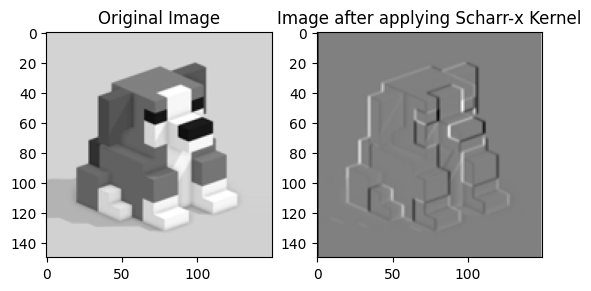

1/1 [==============================] - 0s 48ms/step


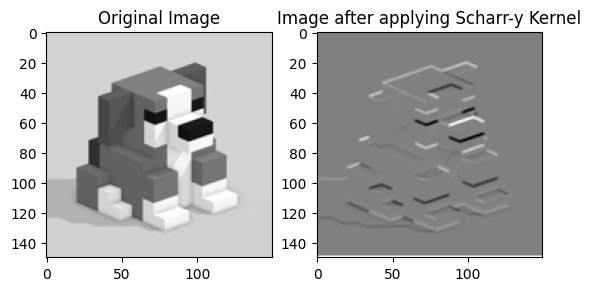

In [14]:
kernels = {
    "Scharr-x" :np.array([
                         [3, 0, -3],
                         [10, 0, -10],
                         [3, 0, -3]]),

    "Scharr-y": np.array([
                         [3, 10, 3], 
                         [0, 0, 0], 
                         [-3, -10, -3]]),
}

for name, kernel in kernels.items():
    apply_kernel_and_display(kernel.reshape(3, 3, 1, 1), name, image_array)
